**Mini_Project_2 - Consumer Complaint Resolution Analysis Using Python**

**Tasks to be performed:**

**Read the Data from the Given excel file**

### Import required libraries

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from datetime import datetime, date
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [143]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

###Loading dataset

In [144]:
df_train = pd.read_csv('Consumer_Complaints_train.csv')
df_test = pd.read_csv('Consumer_Complaints_test.csv')

In [145]:
#Printing top 5 records of train dataset
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [146]:
#Printing top 5 records of test dataset
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [147]:
#Printing shape of train and test dataset
df_train.shape, df_test.shape

((358810, 18), (119606, 17))

In [148]:
#Printing columns of train and test datasets

In [149]:
df_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [150]:
df_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

**Check the data type for both data (test file and train file)**

In [151]:
data_types_train = pd.DataFrame(df_train.dtypes, columns = ['Train'])
data_types_test = pd.DataFrame(df_test.dtypes, columns = ['Test'])
data_types = pd.concat([data_types_train, data_types_test], axis = 1)
data_types

,Train,Test
Date received,object,object
Product,object,object
Sub-product,object,object
Issue,object,object
Sub-issue,object,object
Consumer complaint narrative,object,object
Company public response,object,object
Company,object,object
State,object,object
ZIP code,object,object


**Do missing value analysis and drop columns where more than 25% of data are missing**

In [152]:
missing_values_train = pd.DataFrame(df_train.isna().sum()/len(df_train)*100, columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum()/len(df_test)*100, columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values

,Train,Test
Date received,0.000000,0.000000
Product,0.000000,0.000000
Sub-product,28.925058,28.997709
Issue,0.000000,0.000000
Sub-issue,61.139322,61.242747
Consumer complaint narrative,84.342688,84.186412
Company public response,81.067696,81.221678
Company,0.000000,0.000000
State,0.809063,0.782569
ZIP code,0.811293,0.783406


In [153]:
missing_values = ['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?']
df_train = df_train.drop(missing_values, axis = 1)
df_test = df_test.drop(missing_values, axis = 1)

**Extracting Day, Month, and Year from Date Received Column and create new fields for a
month, year, and day**

In [154]:
df_train['Year_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_test['Year_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_train['Month_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_test['Month_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_train['Day_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)
df_test['Day_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)

In [155]:
#Converting dates from object type to datetime type
df_train['Date received'] = pd.to_datetime(df_train['Date received'])
df_test['Date received'] = pd.to_datetime(df_test['Date received'])
df_train['Date sent to company'] = pd.to_datetime(df_train['Date sent to company'])
df_test['Date sent to company'] = pd.to_datetime(df_test['Date sent to company'])

**Calculate the Number of Days the Complaint was with the Company and create a new
field as “Days held”**


In [156]:
df_train['Days held'] = df_train['Date sent to company'] - df_train['Date received']
df_test['Days held'] = df_test['Date sent to company'] - df_test['Date received']

In [157]:
#Converting "Days Held" to Int(above column)
df_train['Days held'] = df_train['Days held'].astype('timedelta64[D]').astype(int)
df_test['Days held'] = df_test['Days held'].astype('timedelta64[D]').astype(int)

**Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" fields**

In [158]:
df_train = df_train.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)
df_test = df_test.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)

**Imputing Null value in “State” by Mode**

In [159]:
df_train['State'].mode(), df_test['State'].mode()

(0    CA
 dtype: object, 0    CA
 dtype: object)

In [160]:
df_train['State'] = df_train['State'].replace(np.nan, 'CA')
df_test['State'] = df_test['State'].replace(np.nan, 'CA')

In [161]:
#Checking Missing Values in the dataset
missing_values_train = pd.DataFrame(df_train.isna().sum(), columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum(), columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values

,Train,Test
Product,0,0.0
Issue,0,0.0
Company,0,0.0
State,0,0.0
Submitted via,0,0.0
Company response to consumer,0,0.0
Timely response?,0,0.0
Consumer disputed?,0,NaN
Year_Received,0,0.0
Month_Received,0,0.0


**with the help of the days we calculated above, create a new field 'Week_Received' where
we calculate the week based on the day of receiving.**

In [162]:
week_train = []
for i in df_train['Day_Received']:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df_train['Week_Received'] = week_train
week_test = []
for i in df_test['Day_Received']:
    if i < 8:
        week_test.append(1)
    elif i >= 8 and i < 16:
        week_test.append(2)
    elif i >=16 and i < 22:
        week_test.append(3)
    else:
        week_test.append(4)
df_test['Week_Received'] = week_test

In [163]:
#Droping "Day_Received"
df_train = df_train.drop(['Day_Received'], axis = 1)
df_test = df_test.drop(['Day_Received'], axis = 1)

In [164]:
#Printing head of train and test dataset to observe

In [165]:
#train dataset
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,4


In [166]:
#test dataset 
df_test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Days held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,0,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,3,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,0,1


**store data of disputed people into the “disputed_cons” variable for future tasks**

In [167]:
disputed_cons = df_train[df_train['Consumer disputed?'] == 'Yes']

**Plot bar graph of the total no of disputes of consumers with the help of seaborn**

Text(0, 0.5, 'Count')

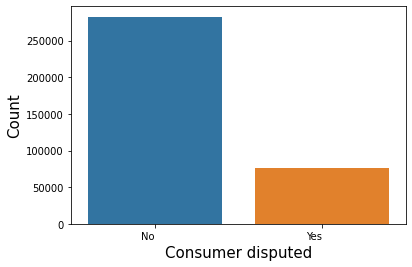

In [168]:
sns.countplot(x = 'Consumer disputed?', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Consumer disputed', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

            Roughly 21% of the consumer have disputed.

**Plot bar graph of the total no of disputes products-wise with the help of seaborn**

Text(0, 0.5, 'Count')

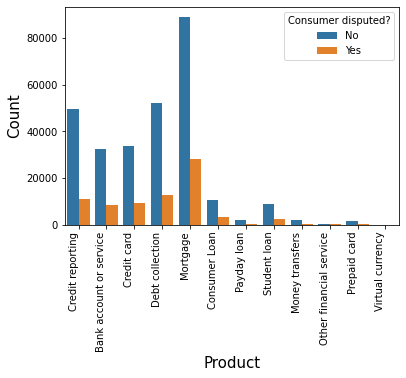

In [169]:
sns.countplot(x = 'Product', hue = 'Consumer disputed?', data = df_train)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

**Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the
help of seaborn**

Text(0, 0.5, 'Count')

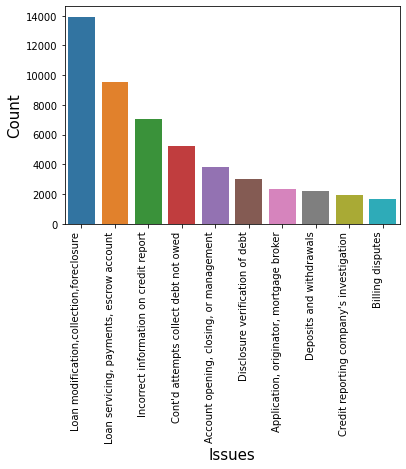

In [170]:
top_issues_disputes = disputed_cons['Issue'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = top_issues_disputes.index, y = top_issues_disputes.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Issues', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

**Plot bar graph of the total no of disputes by State with Maximum Disputes**

Text(0, 0.5, 'Count')

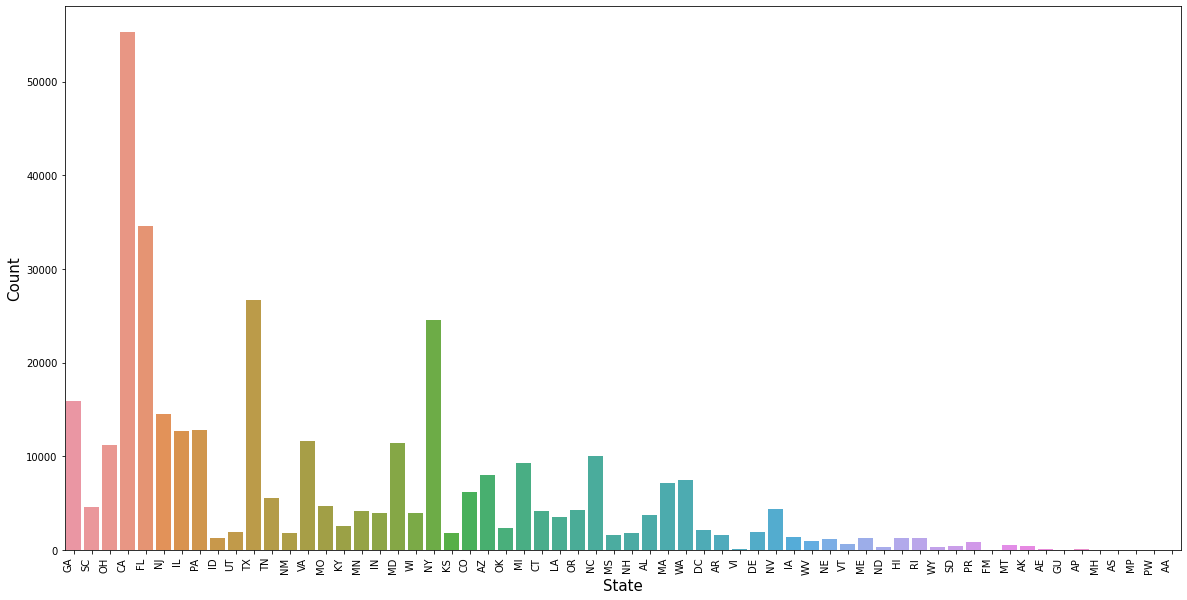

In [171]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = df_train['State'])
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

**Plot bar graph of the total no of disputes Submitted Via different source**

Text(0, 0.5, 'Count')

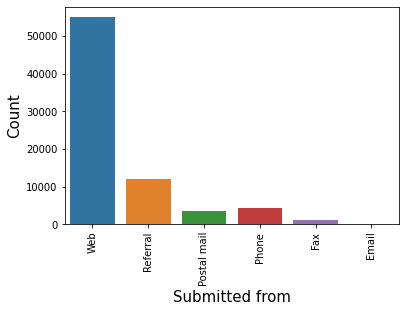

In [172]:
sns.countplot(x = 'Submitted via', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Submitted from', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

    72% disputes are submitted via web.
    88% disputes are submitted via web and referral.

**Plot bar graph of the total no of disputes where the Company's Response to the
Complaints**

Text(0, 0.5, 'Count')

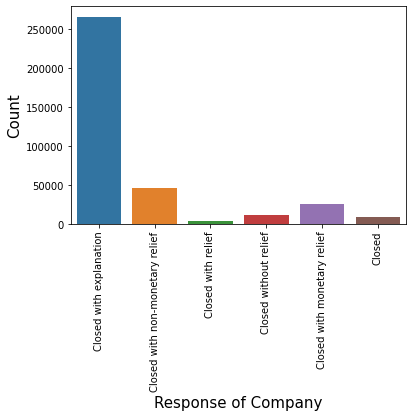

In [173]:
sns.countplot(x = 'Company response to consumer', data = df_train)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response of Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

    74% complaints are closed with explanation

**Plot bar graph of the total no of disputes where the Company's Response Leads to
Disputes**

Text(0, 0.5, 'Count')

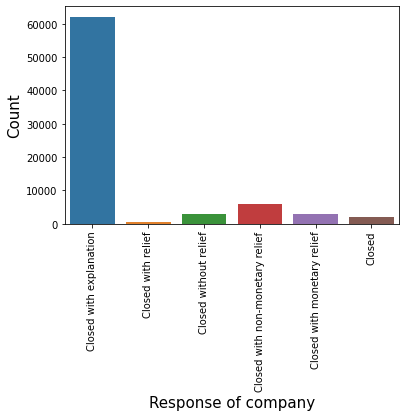

In [174]:
sns.countplot(x = 'Company response to consumer', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response of company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

    82% disputes are closed with explanation at the initial stage.
    89% disputes are either closed with explanation or non-monetary relief in the earlier stage.

**Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely
Response**

Text(0, 0.5, 'Count')

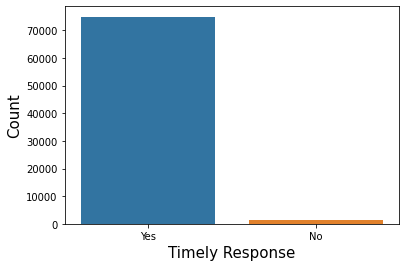

In [175]:
sns.countplot(x = 'Timely response?', data = disputed_cons)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Timely Response', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

    98% disputes were timely repsonded at the intial stages.

**Plot bar graph of the total no of disputes over Year Wise Complaints**

Text(0, 0.5, 'Count')

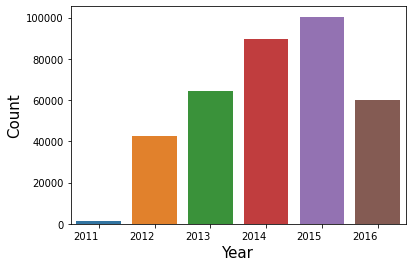

In [176]:
sns.countplot(x = 'Year_Received', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        28% complaints are raised in 2015.
        53% complaints are raised in 2014 and 2015.
        71% complaints are raised in 2013 to 2015.
        88% complaints are raised in 2013 to 2016.

**Plot bar graph of the total no of disputes over Year Wise Disputes**

Text(0, 0.5, 'Count')

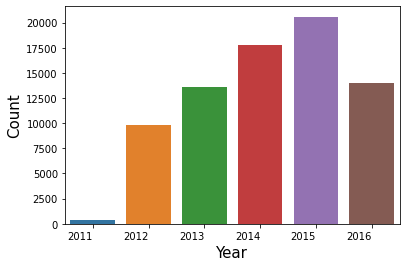

In [177]:
sns.countplot(x = 'Year_Received', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

    27% disputes are raised in 2015.
    50% disputes are raised in 2014 and 2015.
    69% disputes are raised in 2014 to 2016.
    87% disputes are raised in 2013 to 2016.

**Plot bar graph of Top Companies with Highest Complaints**

Text(0, 0.5, 'Count')

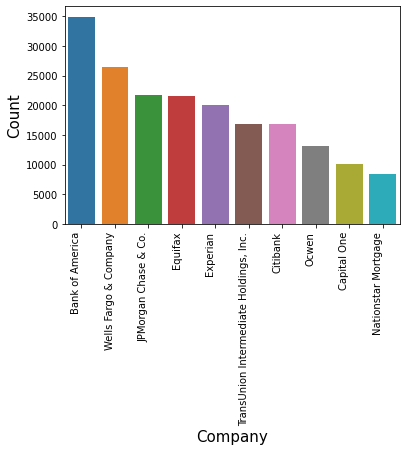

In [178]:
worst_company_complaints = df_train['Company'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = worst_company_complaints.index, y = worst_company_complaints.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

          53% complaints are for these 10 companies.

**Converte all negative days held to zero (it is the time taken by the authority that can't be
negative)**

In [179]:
df_train['Days held'].describe()

count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days held, dtype: float64

In [180]:
df_test['Days held'].describe()

count    119606.000000
mean          4.443607
std          16.233377
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: Days held, dtype: float64

In [181]:
#Converting Negative Days Held to Zero
Days_held_train = []
for i in df_train['Days held']:
    if i < 0:
        Days_held_train.append(0)
    else:
        Days_held_train.append(i)
df_train['Days_held'] = Days_held_train
Days_held_test = []
for i in df_test['Days held']:
    if i < 0:
        Days_held_test.append(0)
    else:
        Days_held_test.append(i)
df_test['Days_held'] = Days_held_test

In [182]:
df_train['Days held'].describe()

count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days held, dtype: float64

In [183]:
df_test['Days held'].describe()

count    119606.000000
mean          4.443607
std          16.233377
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: Days held, dtype: float64

In [184]:
#Droping Days Held
df_train = df_train.drop('Days held', axis = 1)
df_test = df_test.drop('Days held', axis = 1)

In [185]:
#Text pre-processing
relevant_text_train = df_train['Issue']
relevant_text_test = df_test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [186]:
df_train['Issues_cleaned'] = clean_data_train
df_test['Issues_cleaned'] = clean_data_test
df_train = df_train.drop('Issue', axis = 1)
df_test = df_test.drop('Issue', axis = 1)

**Drop Unnecessary Columns for the Model Building
like:'Company', 'State', 'Year_Received', 'Days_held'**

In [187]:
drop_cols = ['Company', 'State', 'Year_Received', 'Days_held']
df_train = df_train.drop(drop_cols, axis = 1)
df_test = df_test.drop(drop_cols, axis = 1)

**Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)**

In [188]:
df_train['Consumer disputed?'] = np.where(df_train['Consumer disputed?'] == "Yes", 1, 0)

**Create Dummy Variables for categorical features and concat with the original data frame
like: 'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?'**'

In [189]:
dum_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
df_train_dummies = pd.get_dummies(df_train[dum_cols], prefix_sep = '_', drop_first = True)
df_test_dummies = pd.get_dummies(df_test[dum_cols], prefix_sep = '_', drop_first = True)

In [190]:
#Concate dummy variables and droping the original columns
df_train = df_train.drop(dum_cols, axis = 1)
df_test = df_test.drop(dum_cols, axis = 1)
df_train = pd.concat([df_train, df_train_dummies], axis = 1)
df_test = pd.concat([df_test, df_test_dummies], axis = 1)

In [191]:
#Calculating TF-IDF
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


In [192]:
#Replacing Issues_cleaned by Vectorized Issues
df_train = df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)

In [193]:
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

In [194]:
df_train.drop('Timely response?_Ye', axis = 1, inplace = True)

KeyError: ignored

In [195]:
df_train.head()


,Consumer disputed?,Month_Received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Feature58,Feature59,Feature60,Feature61,Feature62,Feature63,Feature64,Feature65,Feature66,Feature67,Feature68,Feature69,Feature70,Feature71,Feature72,Feature73,Feature74,Feature75,Feature76,Feature77,Feature78,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,Feature88,Feature89,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118,Feature119,Feature120,Feature121,Feature122,Feature123,Feature124,Feature125,Feature126,Feature127,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,10,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399029,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469431,0.0,0.0,0.469773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.469773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.596349,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0

In [196]:
df_test.head()

,Month_Received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Feature58,Feature59,Feature60,Feature61,Feature62,Feature63,Feature64,Feature65,Feature66,Feature67,Feature68,Feature69,Feature70,Feature71,Feature72,Feature73,Feature74,Feature75,Feature76,Feature77,Feature78,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,Feature88,Feature89,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118,Feature119,Feature120,Feature121,Feature122,Feature123,Feature124,Feature125,Feature126,Feature127,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.874274,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.437137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211085,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,6,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,0.753491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.243968,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329255,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.291153,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423737,0.

In [197]:
df_train.shape, df_test.shape

((358810, 193), (119606, 192))

**Scaling the Data Sets (note: discard dependent variable before doing standardization)
and Make feature Selection with the help of PCA up to 80% of the information.**

In [198]:
df_train_scaled = pd.DataFrame(StandardScaler().fit_transform(df_train.drop('Consumer disputed?', axis = 1)), columns = df_test.columns)
df_test_scaled = pd.DataFrame(StandardScaler().fit_transform(df_test), columns = df_test.columns)

In [199]:
#Performing feature selection with help of PCA
pca_columns = []
for i in range(df_train_scaled.shape[1]):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA()
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum.head(60)

,Variable,Importance
0,PC1,Explained Info 0.0 dtype: float64
1,PC2,Explained Info 0.035882 dtype: float64
2,PC3,Explained Info 0.069329 dtype: float64
3,PC4,Explained Info 0.10149 dtype: float64
4,PC5,Explained Info 0.128148 dtype: float64
5,PC6,Explained Info 0.153022 dtype: float64
6,PC7,Explained Info 0.177157 dtype: float64
7,PC8,Explained Info 0.199399 dtype: float64
8,PC9,Explained Info 0.221115 dtype: float64
9,PC10,Explained Info 0.242562 dtype: float64


In [200]:
#Selecting top features which are covering 80% of the information (n=53)
pca_columns = []
for i in range(53):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 53)
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)

In [201]:
df_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,5.356834,-2.269600,-1.152899,-1.027848,0.162167,-0.915556,-0.481326,0.338684,0.085713,-0.100843,-0.200018,0.744797,-0.280775,-0.284186,-0.288020,0.256143,-0.171054,-0.050058,0.377698,0.028614,-0.010490,0.079659,-0.595030,0.009688,-0.382331,0.815633,0.060235,-0.421577,0.056750,-0.545527,-0.099455,0.135882,-0.623332,0.000524,0.053636,0.079118,-0.094872,-0.133889,0.159705,-0.073860,-0.021296,0.078269,-0.015810,-0.148485,-0.038928,0.605258,0.120579,-0.483855,0.376567,-0.741493,-0.736517,0.055110,0.173627
1,-0.147054,0.019694,-0.053015,0.798884,-0.439435,-0.153189,1.476819,-0.277111,-0.867672,0.110515,0.058546,-1.519629,0.052251,5.705638,-1.424557,1.823191,-0.338461,-0.617144,0.021616,0.106152,-0.211891,-0.006617,0.598109,0.036737,-0.231319,0.953613,-5.518561,1.311237,2.382996,-0.237131,0.156357,0.250290,0.581830,0.012634,0.339402,0.087627,-0.153409,-0.294724,-1.268675,-0.557079,-0.256949,-0.127860,0.014734,-0.148475,-0.115314,0.597104,-0.223150,-0.210444,0.256169,-1.623001,-1.413649,-0.084936,0.231306
2,0.158032,-0.003301,-0.005814,0.810175,-0.613700,0.030822,1.091469,0.107406,-1.049034,0.092004,-0.162927,-0.941299,0.486422,0.454923,0.092378,-0.998680,0.326430,0.269244,-0.107844,0.147966,0.011430,-0.719398,0.201805,0.000897,0.892852,0.293840,-0.319306,0.293733,-1.398473,0.579392,-0.447538,-0.231178,-0.582527,-0.051307,-0.082800,-0.139561,0.095664,0.221332,-0.244831,0.227873,0.151321,-0.090450,-0.048811,-0.175396,0.590625,-1.248809,1.726106,0.581306,-1.725709,1.834889,2.135323,0.712978,-2.233491
3,-0.817871,-0.912070,3.535512,0.336687,-0.903298,-0.165746,-0.587869,-1.259688,0.288077,-0.153429,3.132185,0.098412,1.144581,0.490994,-0.440375,-0.500650,-0.297375,5.579665,1.211295,-2.777427,-2.760453,-0.987780,2.888631,-0.134782,-2.225037,0.332144,0.740302,-0.253616,1.076947,-0.314749,-0.841453,0.877865,-0.022781,-0.167488,-0.726633,0.125792,-0.074372,0.077615,-0.120567,0.057370,0.016441,-0.093122,0.043434,0.076066,-0.130896,0.089419,0.183734,-0.327932,-0.115567,1.098271,0.540347,0.174709,0.102570
4,-0.509786,-1.051664,3.915089,0.487264,-0.841904,-0.060759,-0.677957,-1.393409,0.719672,-0.292401,3.017593,0.053978,1.393504,0.414069,-0.483011,-0.502901,-0.359689,5.574399,1.388123,-2.814404,-2.614522,-0.847053,2.389420,-0.135620,-2.142879,0.096349,1.069284,-0.158647,0.800395,-0.106271,-0.587800,0.764572,0.319623,-0.181057,-0.621785,0.121196,-0.120970,0.011581,0.150144,-0.045097,-0.050662,0.019327,0.016402,0.031031,-0.083406,0.118255,-0.104517,-0.021770,0.076166,-0.651274,-0.562437,-0.015446,0.196305


In [202]:
#same for test data also
pca_model = PCA(n_components = 53)
pca_model.fit(df_test_scaled)
df_pca_test = pd.DataFrame(pca_model.transform(df_test_scaled), columns = pca_columns)

In [203]:
df_pca_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,-0.129946,0.380801,-0.245635,1.356733,-1.032753,-0.133850,1.259208,0.375537,-1.047872,-0.421240,-0.190607,-1.697331,1.716549,0.670449,0.399612,-2.073277,-0.181470,0.730638,-0.354555,-0.040635,-0.143316,-0.588329,-0.190424,2.722860,1.471115,-0.401521,-0.210640,1.281172,-5.385474,0.909904,-2.665410,-0.282406,-0.800784,0.100585,-3.932635,-0.764620,17.419849,-3.300968,0.732897,1.894248,0.476831,-2.621254,2.550549,-1.502878,-0.564640,1.169915,2.765376,-1.391518,-1.273704,-0.017647,-1.827218,-0.714156,-2.404698
1,0.923404,1.553055,0.766725,0.347688,1.316713,4.116614,1.096320,2.542869,2.746775,0.704037,-1.142826,2.118502,1.578461,-0.087923,0.101716,5.597276,3.109421,0.677256,-3.486911,0.145612,-0.598614,0.767749,0.420691,4.353919,-0.050260,-2.405443,1.467683,4.284819,1.118937,-0.778021,-0.711386,-0.603997,-0.540448,2.069526,-0.337047,0.020829,-0.187093,-0.955799,0.552468,0.785968,-0.006608,-0.387303,-0.664904,-0.806553,-0.418740,2.208636,-1.663814,4.789508,-1.216951,-5.864385,2.778328,6.124137,-1.470434
2,0.816324,-0.289778,-0.106821,1.441807,-0.725663,0.391851,1.694403,0.189937,-1.596600,0.682451,0.049280,-1.768474,0.659556,0.545785,-0.145924,-3.492668,-2.654276,4.124152,-2.054536,-1.023038,2.950864,-3.685018,-0.046996,21.730023,-2.604455,6.820546,0.021916,-13.940173,9.791969,-0.993966,1.961053,-0.241888,0.234885,-1.474100,0.063332,-0.418814,0.215057,0.229250,-0.104763,0.013843,0.071261,-0.332534,0.003680,0.054326,-0.136752,-0.654095,0.803352,0.505263,0.347021,-1.121600,-0.271768,-0.231604,-0.139508
3,4.956138,12.125639,2.013814,-2.461873,6.552899,10.517808,-0.180890,-1.315797,0.387134,-0.301678,0.713273,-1.040210,0.960993,0.072575,0.227368,-0.257130,-0.488362,0.246657,0.368559,0.129842,0.318541,-0.403190,-0.963983,-0.705224,0.638099,-3.260341,-0.785002,-2.780495,-1.214156,-3.295989,0.042651,-1.046085,1.022116,0.025894,-0.113837,-0.178389,-0.175759,0.056552,-0.109375,-0.110624,-0.031204,0.097093,0.027820,0.036697,0.549118,1.730349,0.517363,-2.479482,0.020109,-0.375899,-0.088663,0.223435,0.079036
4,-0.054855,-0.565546,3.331728,4.384344,-2.563351,0.321546,-3.156225,-5.839960,3.967836,2.824947,10.434419,2.233002,1.706879,-1.868798,-3.096604,0.457361,0.099389,-1.995881,2.686393,4.475662,-2.309283,0.391680,-1.758082,1.736035,0.191043,-0.252257,-0.662077,0.093849,-0.441429,-0.406038,-0.477490,0.137377,-0.026425,-0.049436,0.349278,0.039387,0.015822,-0.113966,-0.023224,0.001461,-0.028308,0.021656,-0.001104,-0.039018,0.101489,-0.259568,-0.111573,0.382606,-0.006774,0.088967,0.146921,0.069398,-0.081418


**Splitting the Data Sets Into X and Y by the dependent and independent variables (data
selected by PCA)**

In [204]:
X = df_pca_train
y = df_train['Consumer disputed?']

In [205]:
#Spliting dataset into Train, and Test datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 17)
X_test = df_pca_test

In [206]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((251167, 53), (107643, 53), (251167,), (107643,), (119606, 53))

### **Model building**
Build given models and measure their test and validation accuracy build given models:
1. LogisticRegression
2.	DecisionTreeClassifier
3.	RandomForestClassifier
4.	AdaBoostClassifier
5.	GradientBoostingClassifier
6.	KNeighborsClassifier
7.	XGBClassifier


In [207]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']
accuracy_train = []
accuracy_val = []
for model in models:
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))
data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Validation Accuracy', ascending = False)

,Modelling Algorithm,Train Accuracy,Validation Accuracy,Difference
3,AdaBoostClassifier,0.787838,0.787399,0.055758
0,LogisticRegression,0.787846,0.787390,0.057947
6,XGBClassifier,0.787846,0.787390,0.057947
4,GradientBoostingClassifier,0.787862,0.787371,0.062326
1,DecisionTreeClassifier,0.800790,0.776056,3.088685
2,RandomForestClassifier,0.800786,0.775759,3.125326
5,KNeighborsClassifier,0.766880,0.752144,1.921623


    LogisticRegression is the best model to build the model.

In [208]:
#Final Model and Prediction for test data file
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Prediction'])
y_pred_test.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [209]:
#Export predictions to CSV
y_pred_test.to_csv('Prediction.csv')

_________________________________________